Otimização Natural  - Lista de exercícios 1 

01) Prova de 2007 - Questão 1

![q1](img/Q1.png)


Resolução:


In [1]:
import numpy as np
import numpy.random as rd
import matplotlib.pyplot as plt
from math import modf
from IPython.display import Markdown as md
import copy


In [2]:
print("===============Início do item a===============")
N = 1000000
x = np.random.uniform(0, 1, N)
res1 = np.mean(x ** 3)
print('Resultado pelo Método de Monte Carlo com N = {}: \n{:.8f}'
      '\n---\n\n'.format(N, res1))

randX = [0.9501, 0.2311, 0.6068]
F_sum = 0
i = 0
for x in randX:
    F_x = x**3
    F_sum += F_x
    i += 1
    print('Passo: {} \nF_x: {:.4f} \nSoma acumulada: {:.4f}\n---'.format(i, F_x, F_sum))

res2 = F_sum / len(randX)
print("Resultado final (média a partir da soma acumulada e do tamanho da amostra): \n"
      "{:.4f}".format(res2))

print("===============Fim do item a===============")
print("===============Início do item b===============")
N = 1000000
x = np.random.uniform(0, 1, N)
res3 = np.mean(x ** 2 * np.exp(-x))
print('Resultado pelo Método de Monte Carlo (dist. uniforme) '
      'com N = {}: \n{:.8f}'
      '\n---\n\n'.format(N, res3))

x = np.random.exponential(1, N)
res4 = np.sum(x[x < 1]**2/N)
print('Resultado pelo Método de Monte Carlo (dist. exponencial) '
      'com N = {}: \n{:.8f}'
      '\n---\n\n'.format(N, res4))

randXexp = [0.0512, 1.4647, 0.4995, 0.7216]
# randNexp = np.random.exponential(1, N)
F_sum = 0
i = 0
for x in randXexp:
    if x >= 1:
        print("x > 1 : F_x não somado, passo não computado"
              "\n---")
        continue
    F_x = x**2
    F_sum += F_x
    i += 1
    print('Passo: {} \nF_x: {:.4f} \nSoma acumulada: {:.4f}\n---'.format(i, F_x, F_sum))

res5 = F_sum / len(randXexp)
print("Resultado final (média a partir da soma acumulada e do tamanho da amostra): \n"
      "{:.4f}".format(res5))
print("===============Fim do item b===============")


===============Início do item a===============
Resultado pelo Método de Monte Carlo com N = 1000000: 
0.25009584
---


Passo: 1 
F_x: 0.8576 
Soma acumulada: 0.8576
---
Passo: 2 
F_x: 0.0123 
Soma acumulada: 0.8700
---
Passo: 3 
F_x: 0.2234 
Soma acumulada: 1.0934
---
Resultado final (média a partir da soma acumulada e do tamanho da amostra): 
0.3645
===============Fim do item a===============
===============Início do item b===============
Resultado pelo Método de Monte Carlo (dist. uniforme) com N = 1000000: 
0.16073485
---


Resultado pelo Método de Monte Carlo (dist. exponencial) com N = 1000000: 
0.16045684
---


Passo: 1 
F_x: 0.0026 
Soma acumulada: 0.0026
---
x > 1 : F_x não somado, passo não computado
---
Passo: 2 
F_x: 0.2495 
Soma acumulada: 0.2521
---
Passo: 3 
F_x: 0.5207 
Soma acumulada: 0.7728
---
Resultado final (média a partir da soma acumulada e do tamanho da amostra): 
0.1932
===============Fim do item b===============


02) Prova de 2007 - Itens 2(a) e 2(b)

![q2](img/Q2.png)

========== Item (a) ==========
x: 1 -> boltzmann(x): 0.01831563888873418
x: 2 -> boltzmann(x): 0.36787944117144233
x: 3 -> boltzmann(x): 1.0
x: 4 -> boltzmann(x): 0.36787944117144233
x: 5 -> boltzmann(x): 0.01831563888873418




========== Item (b) ==========
E[F(X)] = 2.99225
M: 100000 
len(stable_states): 100000
Teste do tamanho da amostra válida: True


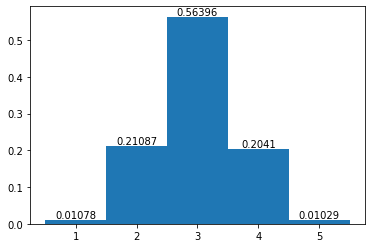

In [3]:
def J(x):
    return (x - 3) ** 2
T = 1
X = [1, 2, 3, 4, 5]
print('========== Item (a) ==========')
for x in X:
    print("x: {} -> boltzmann(x): {}".format(x, np.exp(-J(x) / T)))

boltzmann = [np.exp(-J(x) / T) for x in X]

print('\n\n\n')
print('========== Item (b) ==========')

x_n = rd.choice(X)
n = 0
kT = 1
N = 1000000
M = 100000
epsilon = 1
stable_states = []
transact = []
# "small eps" = same magnitude of the smaller difference in state space

while n < N:
    R = rd.choice((-1, 1))
    possible_x_npp = x_n + epsilon * R
    # possible_x_npp = possible_x_npp % max(X) + 1  # closed box
    if possible_x_npp == 6:
        possible_x_npp = 1
    if possible_x_npp == 0:
        possible_x_npp = 5

    deltaJ = J(possible_x_npp) - J(x_n)

    q = np.exp(-deltaJ/kT)
    r = rd.uniform(0, 1)

    a = 0 if r > q else 1

    if deltaJ < 0:
        x_n = possible_x_npp
    else:
        x_n = (1-a)*x_n + a*possible_x_npp

    n += 1

    if n > N - M:
        stable_states.append(x_n)


E_F_X = np.mean(stable_states)
print("E[F(X)] = {}".format(E_F_X))
print("M: {} \nlen(stable_states): {}".format(M, len(stable_states)))
print("Teste do tamanho da amostra válida: {}".format(len(stable_states) == M))

# plt.hist(stable_states, bins=(np.arange(6)+0.5))
_, _, bars = plt.hist(stable_states, density=True, bins=(np.arange(6)+0.5))
plt.bar_label(bars)
plt.show()


03) Lista de Exercícios 1 da CPE723 Edição Presencial - Exercício 3(a) (não é preciso fazer o item (b))

![q3](img/Q3.png)

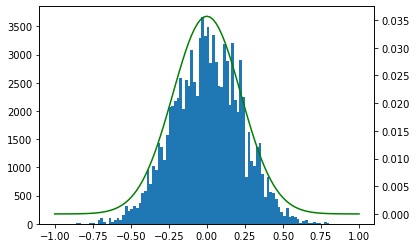

In [4]:
# Question 3 - Metropolis Algorithm


def J(x):
    return x ** 2


x_n = rd.randn()
n = 0
kT = .1
N = 100000
M = 100000
epsilon = .1
stable_states = []

while n < N:
    R = rd.uniform(-100, 100)
    possible_x = x_n + epsilon * R

    deltaJ = J(possible_x) - J(x_n)

    q = np.exp(-deltaJ/kT)
    r = rd.uniform(0, 1)

    a = 0 if r > q else 1

    if deltaJ < 0:
        x_n = possible_x
    else:
        x_n = (1-a) * x_n + a * possible_x

    n += 1
    if n > N - M:
        stable_states.append(x_n)

E_F_X = np.mean(stable_states)
# print("E[F(X)] = {}".format(E_F_X))
fig, ax1 = plt.subplots()
_, _, bars = plt.hist(stable_states, density=False, bins=100)

"""Comparativo"""
X = np.linspace(-1, 1, 101)
boltz = np.exp(-X**2/.1)

ax2 = ax1.twinx()
plt.plot(X, boltz/sum(boltz), 'g-')

plt.show()




04) Prova de 2008 - Questão 1

![q4](img/Q4.png)

O algoritmo de Metropolis gera uma distribuição proporcional ao fator de Boltzmann desta forma tem-se que: 

$$ \frac{e^{-J(x) / kT}}{Z}= f_X(x)$$

$$ J(x) = -kT · \ln( f_X(x) · Z) $$

Onde $ Z = \int_X \exp( -J(x) / kT)·dx $, considerando que esta deve ser unitária para satisfazer a condição de f.d.p., temos que:

$$ J(x) = -kT·\ln{f_X(x)} $$

Considerando arbitrariamente $f_X(x)$ como uma distribuição exponencial de $\lambda = 1$:
$$ J(x) = kT·x $$

Item b)
Foi implementado o seguinte código em python para o algoritmo solicitado:


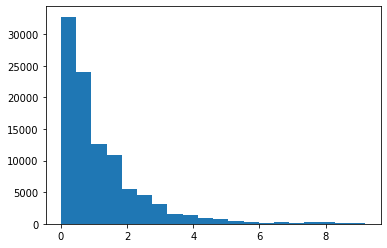

In [18]:
def J(x):
    return x


if __name__ == "__main__":

    x_n = 1 #rd.randn()
    n = 0
    kT = 1
    N = 1000000
    M = 100000
    epsilon = .1
    stable_states = []

    while n < N:
        R = rd.choice([-1, 1])
        x_hat = x_n + R * epsilon
        if x_hat < 0:
            continue
        # x_hat = R

        deltaJ = J(x_hat) - J(x_n)

        q = np.exp(-deltaJ/kT)
        r = rd.uniform(0, 1)

        a = 0 if r > q else 1

        if deltaJ < 0:
            x_n = x_hat
        else:
            x_n = (1-a) * x_n + a * x_hat

        n += 1
        if n > N - M:
            stable_states.append(x_n)

    E_F_X = np.mean(stable_states)

    fig, ax1 = plt.subplots()
    _, _, bars = plt.hist(stable_states, density=False, bins=20)
    plt.show()



05) Prova de 2011 - Questão 1

![q5](img/Q5.png)

a) o algoritmo de Metropolis pode ser utlilizado para gerar uma densidade conveniente. 
b) Para avaliação da integral se pode utilizar o método de Monte Carlo (MC) se compensando os pesos. Para cálculo da compensação dos pesos é possível se valer da simetria da superfície analisada, para maior eficiência, utilizando-se também o método de MC para integrar sobre o primeiro quadrante da área de interesse e multiplicar o valor por 4 para que o valor corresponda a toda a área. O valor obtido desta forma foi 1,1345. A implementação é apresentada abaixo.

In [21]:

# ”””ITEM A”””
def J(x):
    return (x[0] ** 2 + x[1] ** 2)


def mirror(x):
    if abs(x) < 1:
        return x
    else:
        f, w = modf(x)	# f = parte fracionada de x; w = parte inteira de x
        return w - f


x_n = rd.randn(2)
n = 0
kT = 1
N = 10000000
M = 1000000
epsilon = 1e-1
stable_states = []

while n < N:
    R = rd.randn(2)
    x_hat = x_n + epsilon * R
    x_hat = np.array([mirror(x_k) for x_k in x_hat])

    deltaJ = J(x_hat) - J(x_n)

    q = np.exp(-deltaJ / kT)
    r = rd.uniform(0, 1)

    a = 0 if r > q else 1

    if deltaJ < 0:
        x_n = x_hat
    else:
        x_n = (1 - a) * x_n + a * x_hat

    n += 1
    if n > N - M:
        stable_states.append(x_n)


# ”””ITEM B”””
E = np.mean([J(x) for x in stable_states])

Z = 4 * np.mean([np.exp(-(J(x))) for x in rd.uniform(0, 1, (10000, 2))])

print("Valor esperado da integral: {}".format(E * Z))


# “””pela distribuição uniforme”””
print("Pela distribuição uniforme: {}"
      .format(4*np.mean([J(x)*np.exp(-J(x)) for x in rd.uniform(-1,1,(1000000,2))])))


Valor esperado da integral: 1.1401280757093333
Pela distribuição uniforme: 1.1317603592471805


06) Prova de 2012 - Itens 1(a), 1(b) e 1(c)

![q6](img/Q6.png)

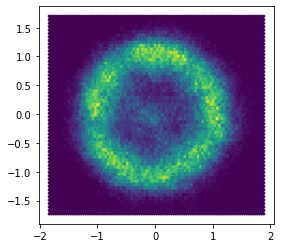

In [7]:
# item a)
def J(X):
    res = 0.0
    for i in range(len(X)):
        res += np.linalg.norm(X[i]) ** 2
        for j in range(i + 1, len(X)):
            res += 1 / np.linalg.norm(X[i] - X[j]) ** 2

    return res


x_n = rd.randn(5, 2)  # configuração inicial qualquer aleatória
n = 0
kT = .1
N = 1000000
M = 100000
epsilon = 5e-2
stable_states = []

while n < N:
    R = rd.randn(5, 2)
    possible_x = x_n + epsilon * R

    deltaJ = J(possible_x) - J(x_n)

    q = np.exp(-deltaJ / kT)
    r = rd.uniform(0, 1)

    a = 0 if r > q else 1

    if deltaJ < 0:
        x_n = possible_x
    else:
        x_n = (1 - a) * x_n + a * possible_x

    n += 1
    if n > N - M:
        stable_states.append(x_n)

X, Y = [], []
for state in stable_states:
    for particle in state:
        X.append(particle[0])
        Y.append(particle[1])

fig, axs = plt.subplots()
axs.set_aspect('equal')
plt.hexbin(X, Y, bins=1000)

Dado que os estados gerados pelo algoritmo de Metropolis são proporcionais aos fatores de Boltzmann associados a estes a proporção dos estados propostos pode ser obtida pela divisão destes fatores da seguiten maneira:

$$ \mathbb{P} = \frac{\mathbb{N}_1}{\mathbb{N}_2} = \frac{e^{\frac{-J_1(r_1)}{kT}}}{e^{\frac{-J_2(r_2)}{kT}}} = \exp{\frac{J_2(r_2) - J_1(r_1)}{kT}}$$


Substituindo as expressões simplificadas $J_1$ e $J_2$ com os raios propostos:


In [8]:
r1 = 1.1291
r2 = 1.0000

J1 = 4*r1**2 + 6.5/(r1**2)
J2 = 5*r2**2 + 5.0/(r2**2)

P = np.exp((J2 - J1)/0.1)
md("Valor obtido de P = {:.6}".format(P))


Valor obtido de P = 0.138015

c) Para se obter o valor médio da variável aleatória proposta da distribuição:
1) Implementa-se a função L(X)
def L(X):

    return np.mean([np.linalg.norm(x) for x in X])

2) Calcula-se a variável para cada um dos pontos armazenados na variável stable_states
   
    E_F_X = np.mean([L(x) for x in stable_states])

Desta forma a função é implementada pelo seguinte código:

/tmp/ipykernel_3926/3654033200.py:31: RuntimeWarning: overflow encountered in exp
  q = np.exp(-deltaJ / kT)


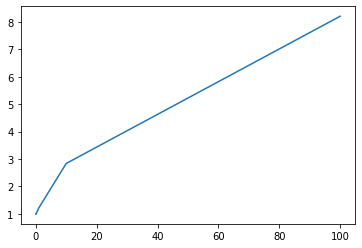

In [9]:

def J(X):
    res = 0.0
    for i in range(len(X)):
        res += np.linalg.norm(X[i]) ** 2
        for j in range(i + 1, len(X)):
            res += 1 / np.linalg.norm(X[i] - X[j]) ** 2

    return res


def L(X):
    return np.mean([np.linalg.norm(x) for x in X])


kTs = [.001, .01, .1, 1, 10, 100]
N = 100000
M = 10000
epsilon = 5e-2
E_F_Xs = []

for kT in kTs:
    x_n = rd.randn(5, 2)  # configuração inicial qualquer aleatória
    stable_states = []
    n = 0
    while n < N:
        R = rd.randn(5, 2)
        possible_x = x_n + epsilon * R

        deltaJ = J(possible_x) - J(x_n)

        q = np.exp(-deltaJ / kT)
        r = rd.uniform(0, 1)

        a = 0 if r > q else 1

        if deltaJ < 0:
            x_n = possible_x
        else:
            x_n = (1 - a) * x_n + a * possible_x

        n += 1
        if n > N - M:
            stable_states.append(x_n)

    # print("kT = {} computado".format(kT))
    E_F_Xs.append(np.mean([L(x) for x in stable_states]))

plt.plot(kTs, E_F_Xs)



In [10]:
res_str = "Lista de E_Fs = \n"
for i in range(len(E_F_Xs)):
    res_str += f"{kTs[i]}: \t{E_F_Xs[i]:.4}" + ",\n "

print(res_str)

Lista de E_Fs = 
0.001: 	0.998,
 0.01: 	1.002,
 0.1: 	1.0,
 1: 	1.219,
 10: 	2.84,
 100: 	8.211,
 


07) Lista de Exercícios 1 da CPE723 Edição Presencial - Exercício 4(a) (de novo, não é preciso fazer o item (b), cálculo manual com 10 valores)

![q7](img/Q7.png)

In [11]:

def J(x):
    return -x + 100 * (x - 0.2) ** 2 * (x - 0.8) ** 2


if __name__ == "__main__":
    x_n = 0.0
    x_min = x_n
    J_n = J(x_n)
    J_min = J_n
    N = 10000
    K = 8
    k = 1

    T_0 = 10
    T = T_0
    epsilon = 5e-1
    n = 0
    finished = False
    history = []

    while not finished:
        n += 1

        x_possible = x_n + epsilon * rd.randn()
        J_possible = J(x_possible)

        deltaJ = J_possible - J_n
        r = rd.uniform(0, 1)

        if r > np.exp(deltaJ/T):
            x_n = x_possible
            J_n = J_possible
            if J_n < J_min:
                J_min = J_n
                x_min = x_n

        history.append((x_min, J_min))
        if n % N == 0:
            k += 1
            T = T_0 / np.log2(1 + k)
            if k == K:
                finished = True


    print("X_min = {:.2} \nJ_min = {:.4}".format(x_min, J_min))

X_min = 0.81 
J_min = -0.8062


/tmp/ipykernel_3926/2904731954.py:30: RuntimeWarning: overflow encountered in exp
  if r > np.exp(deltaJ/T):


Para verificação, observamos o gráfico da função código a baixo onde vê-se que o o algoritmo obteve uma solução próxima do mínimo absoluto.

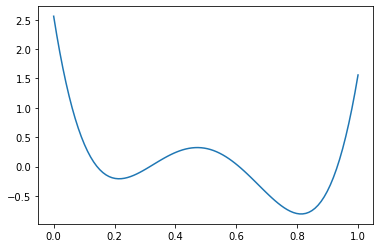

In [12]:
X = np.linspace(0, 1, 100)
plt.plot(X, [J(x) for x in X])

08) Lista de Exercícios 1 da CPE723 Edição Presencial - Exercício 5

![q8](img/Q8.png)

Propõe-se como função a norma de um vetor de 4 dimensões: 

$$ ||X||= \sqrt[4]{x_1^4 + x_2^4 + x_3^4 + x_4^4} $$

Dado que $||X|| ≤ 0 → Xmin = 0 $

Para se buscar o mínimo foi implementada a seguinte função:

In [13]:
def J(x):
    return (
        x[0] ** 4 +
        x[1] ** 4 +
        x[2] ** 4 +
        x[3] ** 4
    ) ** 0.25


if __name__ == "__main__":
    x_n = np.array([1, 2, 3, 4])
    x_min = x_n
    J_n = J(x_n)
    J_min = J_n
    N = 10000
    K = 32
    k = 1

    T_0 = 1
    T = T_0
    epsilon = 5e-3

    n = 0
    finished = False
    history = []

    while not finished:
        n += 1

        x_possible = x_n + epsilon * rd.randn(4)
        J_possible = J(x_possible)

        deltaJ = J_possible - J_n
        r = rd.uniform(0, 1)

        if r > np.exp(deltaJ / T):
            x_n = x_possible
            J_n = J_possible
            if J_n < J_min:
                J_min = J_n
                x_min = x_n

        history.append((x_min, J_min))
        if n % N == 0:
            k += 1
            T = T_0 / np.log2(1 + k)
            if k > K:
                finished = True


    res_str = "X_min = "
    for x_i in x_min:
        res_str += f"{x_i:.4}" + ", "

    res_str += f"\nJ_min = {J_min:.4}"

    print(res_str)


X_min = -0.001839, -0.001208, -0.0001662, 0.0001891, 
J_min = 0.001919


09) Prova de 2008 - Questão 3

![q9](img/Q9.png)

X_min =  [0, 4, 3, 2, 1, 0] 
J_min =  5.0


[Text(0, 0, '0.00687'),
 Text(0, 0, '0.00706'),
 Text(0, 0, '0.0226'),
 Text(0, 0, '0.02268'),
 Text(0, 0, '0.02314'),
 Text(0, 0, '0.02329'),
 Text(0, 0, '0.02353'),
 Text(0, 0, '0.02364'),
 Text(0, 0, '0.0238'),
 Text(0, 0, '0.02392'),
 Text(0, 0, '0.02408'),
 Text(0, 0, '0.02508'),
 Text(0, 0, '0.04151'),
 Text(0, 0, '0.04304'),
 Text(0, 0, '0.04327'),
 Text(0, 0, '0.04372'),
 Text(0, 0, '0.04398'),
 Text(0, 0, '0.04441'),
 Text(0, 0, '0.04451'),
 Text(0, 0, '0.04452'),
 Text(0, 0, '0.04476'),
 Text(0, 0, '0.04501'),
 Text(0, 0, '0.1553'),
 Text(0, 0, '0.1563')]

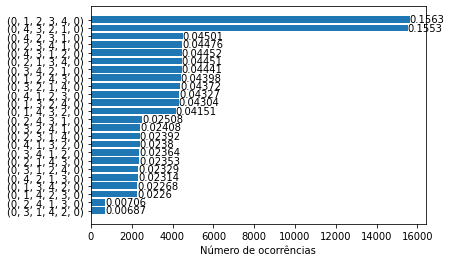

In [14]:
def get_aleatory_state(n_cities):
    intermediates = list(range(1, n_cities))
    rd.shuffle(intermediates)
    return [0]+intermediates+[0]


def small_mod_state(X_0):
    X = copy.deepcopy(X_0)
    idx_1 = rd.choice(range(1, len(X) - 1))
    idx_2 = rd.choice(range(1, len(X) - 1))
    X[idx_1], X[idx_2] = X[idx_2], X[idx_1]
    return X


step_cost = {           ## MODIFICAR PARA GENERALIZAR
    0: 0.00,
    1: 1.00,
    2: 1.62,
    3: 1.62,
    4: 1.00
}


def J(X):
    step_distances = [abs(X[i-1] - X[i]) for i in range(len(X))]
    step_costs = [step_cost[d] for d in step_distances]
    return sum(step_costs)


x_n = get_aleatory_state(5)
x_min = x_n
J_n = J(x_n)
J_min = J_n
N = 10000
K = 32
k = 1

T_0 = 1
T = T_0
epsilon = 5e-3

n = 0
finished = False
history = []

"""Otimização por simulated annealing"""
while not finished:
    n += 1

    x_possible = small_mod_state(x_n)
    J_possible = J(x_possible)

    deltaJ = J_possible - J_n
    r = rd.uniform(0, 1)

    if r > np.exp(deltaJ / T):
        x_n = x_possible
        J_n = J_possible
        if J_n < J_min:
            J_min = J_n
            x_min = x_n

    history.append((x_min, J_min))
    if n % N == 0:
        k += 1
        T = T_0 / np.log2(1 + k)
        if k > K:
            finished = True

print("X_min = ", x_min, "\nJ_min = ", J_min)


""" Geração de estados aleatórios por Algoritmo de Metropolis """

x_n = get_aleatory_state(5)
n = 0
kT = 1
N = 1000000
M = 100000
stable_states = {}

while n < N:
    possible_x = small_mod_state(x_n)

    deltaJ = J(possible_x) - J(x_n)

    q = np.exp(-deltaJ/kT)
    r = rd.uniform(0, 1)

    a = 0 if r > q else 1

    if deltaJ < 0:
        x_n = possible_x
    else:
        x_n = (1-a) * x_n + a * possible_x

    n += 1
    if n > N - M:
        x_n_tuple = tuple(x_n)
        if x_n_tuple in tuple(stable_states.keys()):
            stable_states[x_n_tuple] += 1
        else:
            stable_states[x_n_tuple] = 1

states_sorted = dict(sorted(stable_states.items(), key=lambda item: item[1]))
containers = plt.barh(range(len(states_sorted.keys())), states_sorted.values())
plt.yticks(range(len(states_sorted.keys())), states_sorted.keys())
plt.xlabel("Número de ocorrências")
labels = ["{:.4}".format(i/sum(states_sorted.values())) for i in     states_sorted.values()]
plt.bar_label(containers, labels)
